In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

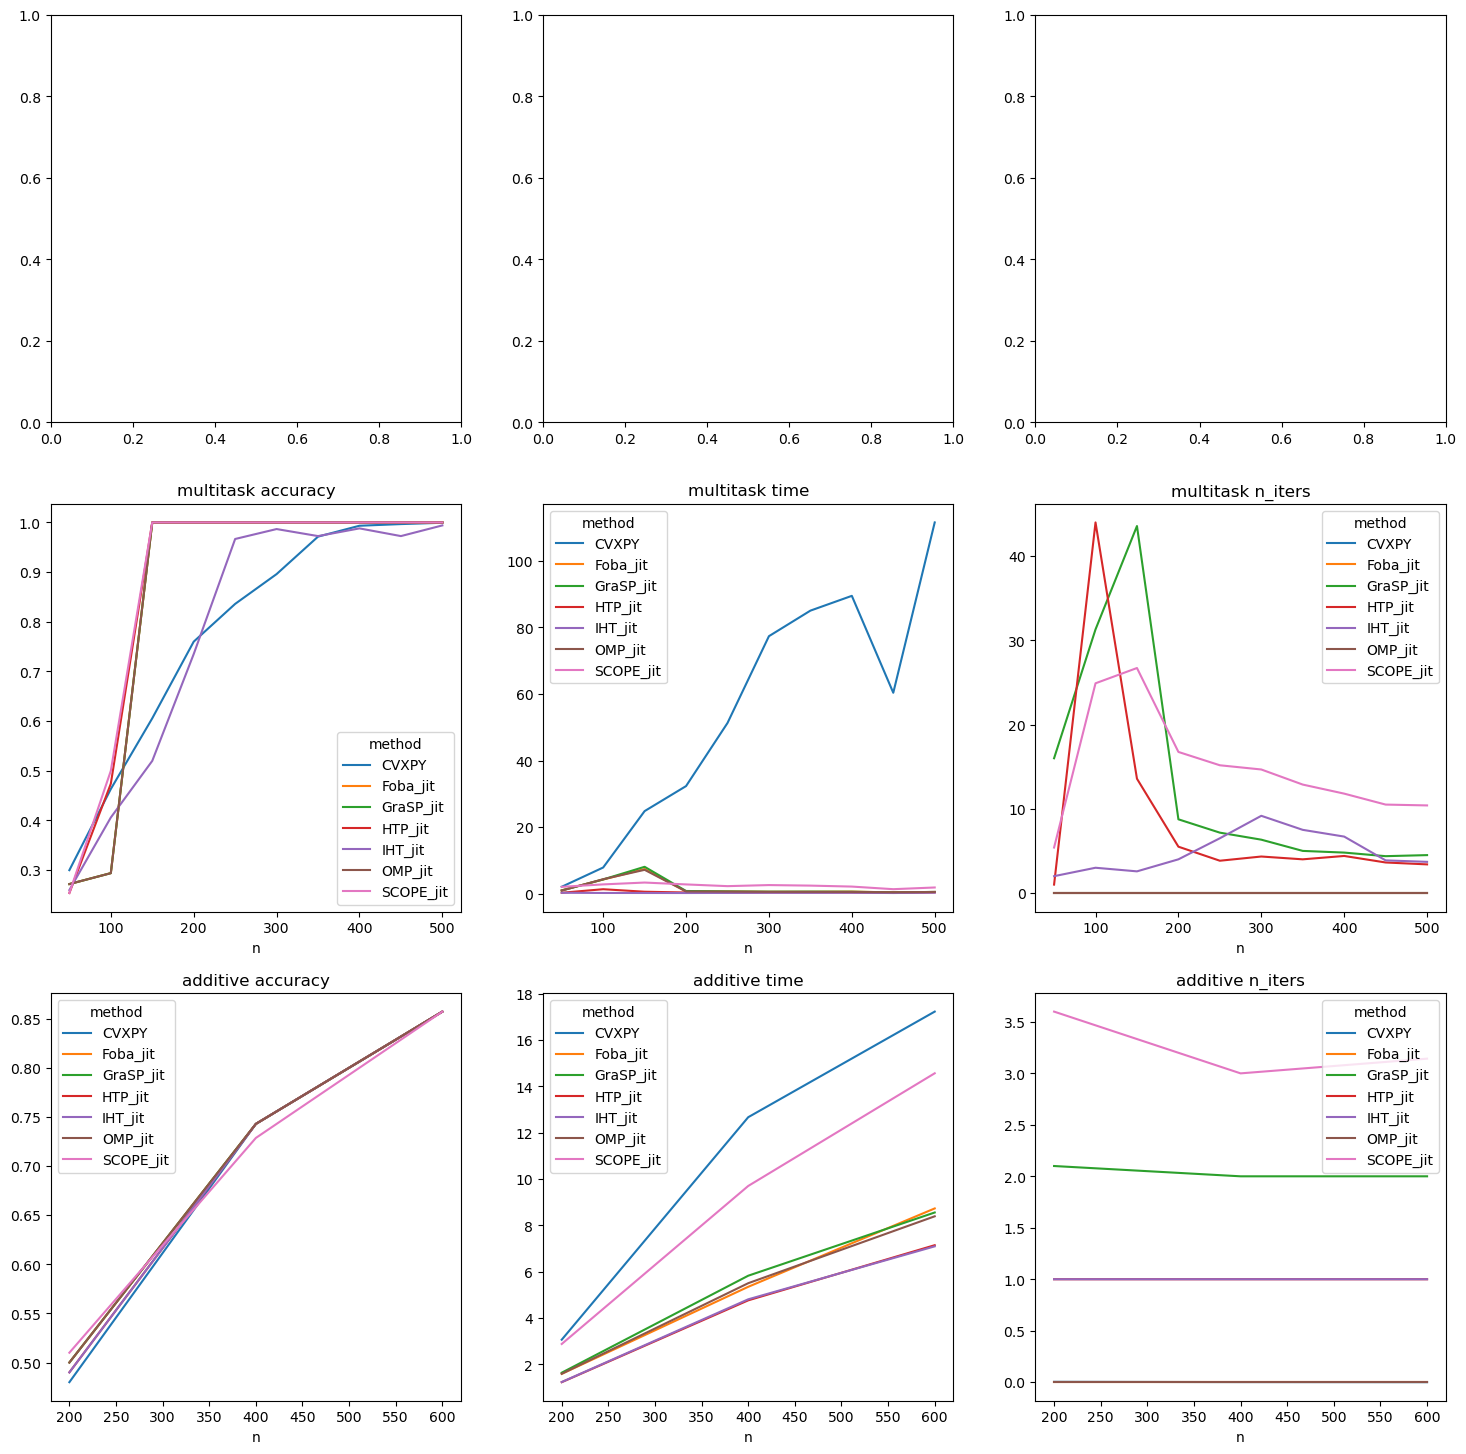

In [2]:
with  open(r"trend_filter-multitask-non_linear.out", 'r') as f:
    df = pd.DataFrame([eval(line) for line in f if line.startswith("{'method': '")])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
for j, metric in enumerate(["accuracy", "time", "n_iters"]):
    df[df.model == "multitask"].groupby(["method", "n"])[metric].mean().unstack(level=0).plot(
        ax=axes[1,j], title="multitask " + metric,
    )
    df[df.model == "additive"].groupby(["method", "n"])[metric].mean().unstack(level=0).plot(
        ax=axes[2,j], title="additive " + metric,
    )



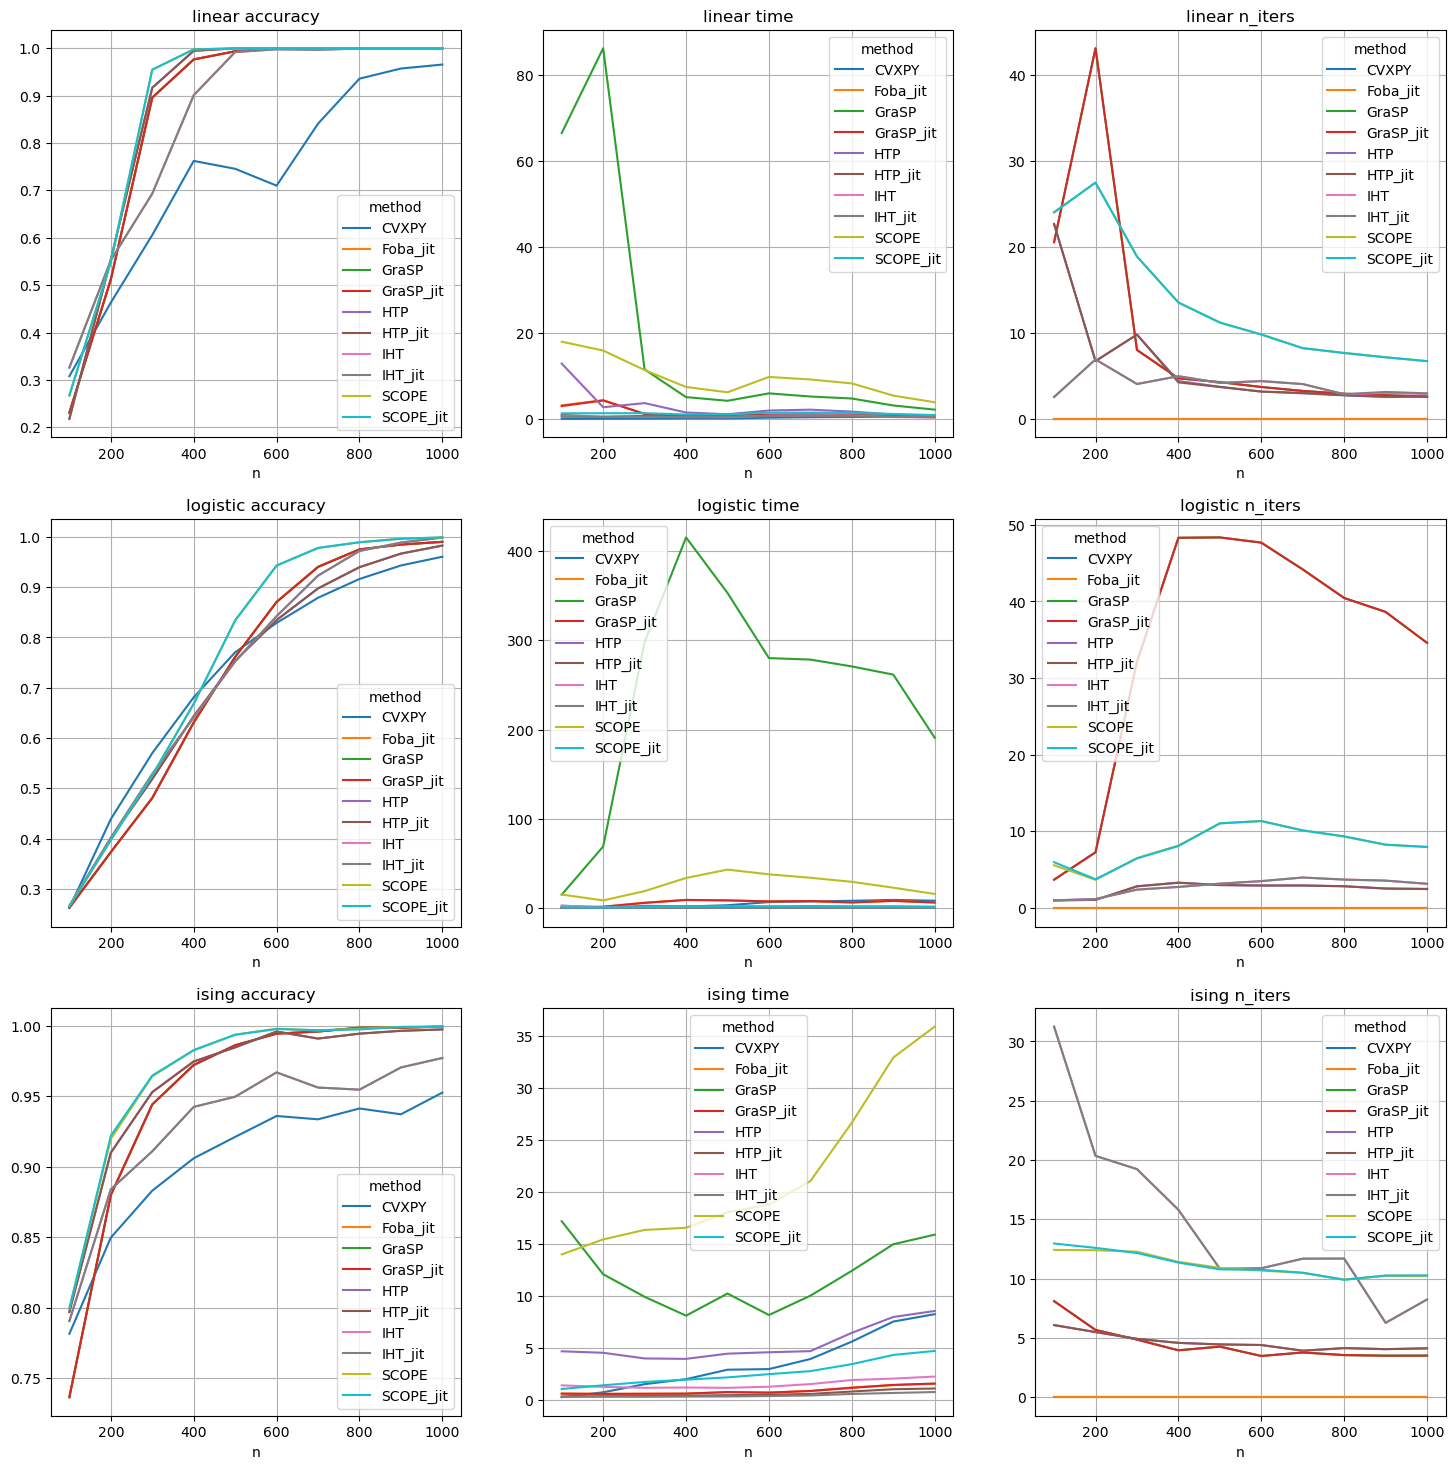

In [2]:
df = pd.read_csv("linear-logistic-ising-1.csv").dropna()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
for i, model in enumerate(["linear", "logistic", "ising"]):
    for j, metric in enumerate(["accuracy", "time", "n_iters"]):
        df[df["model"] == model].groupby(['n', 'method'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
        )

<Axes: title={'center': 'ising_n_iters'}, xlabel='n'>

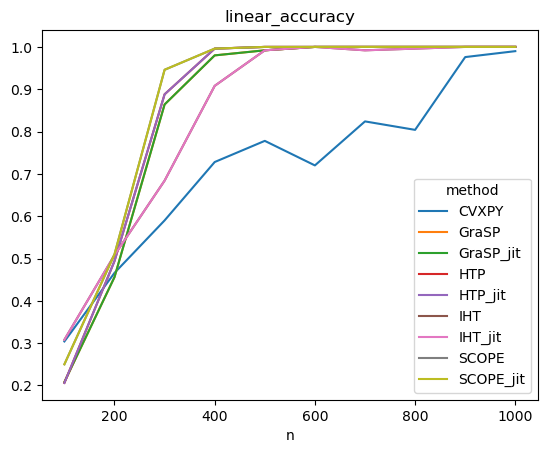

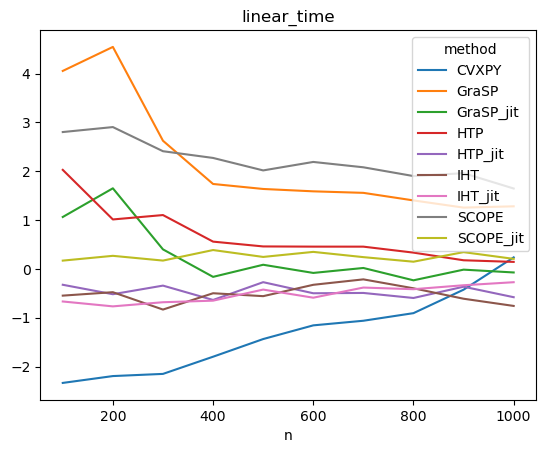

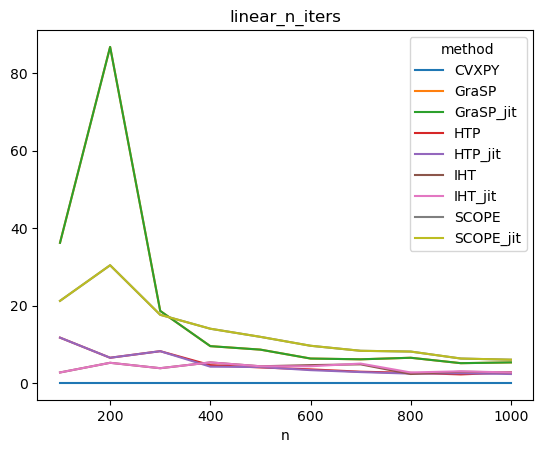

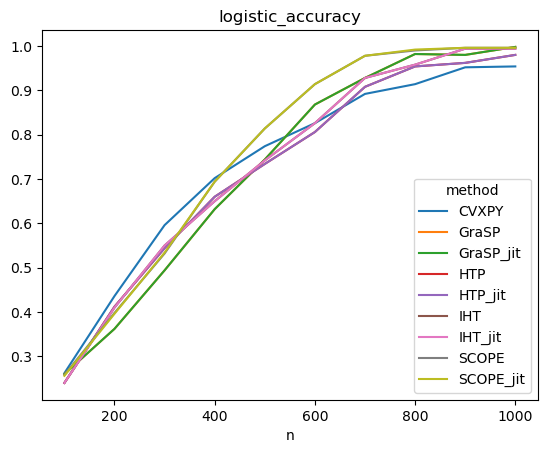

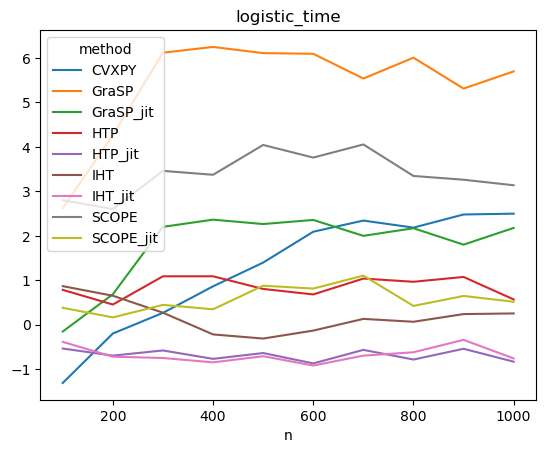

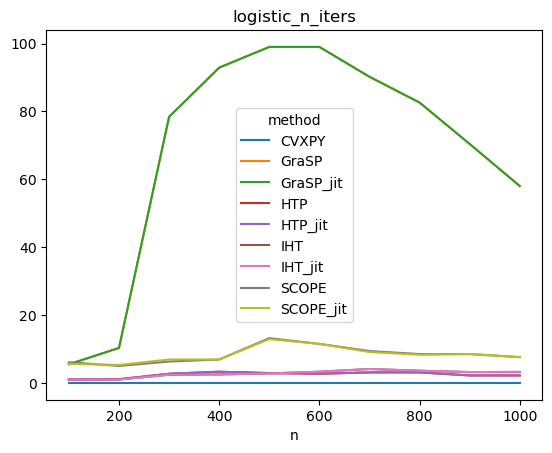

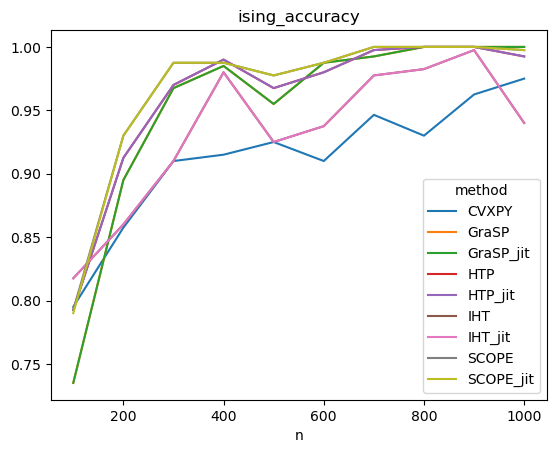

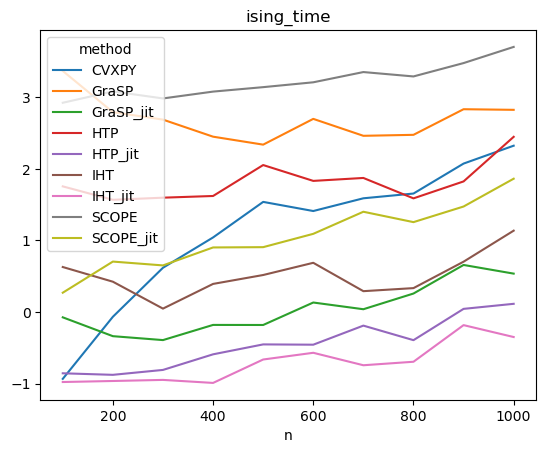

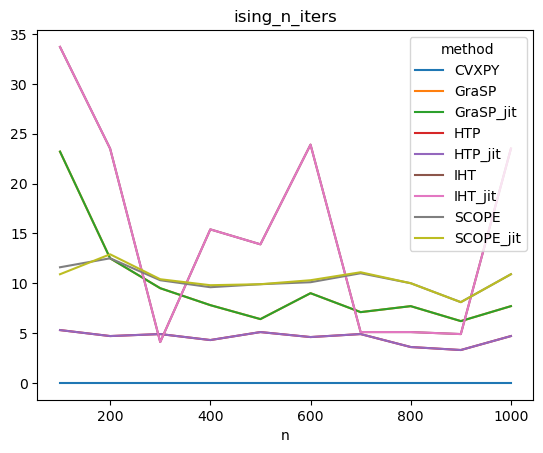

In [4]:
df = pd.read_csv('linear-logistic-ising.csv').dropna()
linear = df.loc[df.model == 'linear']
logistic = df.loc[df.model == 'logistic']
ising = df.loc[df.model == 'ising']

linear_accuracy = linear.groupby(['n', 'method'])['accuracy'].mean().unstack()
linear_time = linear.groupby(['n', 'method'])['time'].mean().apply(lambda x: np.log(x)).unstack()
linear_n_iters = linear.groupby(['n', 'method'])['n_iters'].mean().unstack()

logistic_accuracy = logistic.groupby(['n', 'method'])['accuracy'].mean().unstack()
logistic_time = logistic.groupby(['n', 'method'])['time'].mean().apply(lambda x: np.log(x)).unstack()
logistic_n_iters = logistic.groupby(['n', 'method'])['n_iters'].mean().unstack()

ising_accuracy = ising.groupby(['n', 'method'])['accuracy'].mean().unstack()
ising_time = ising.groupby(['n', 'method'])['time'].mean().apply(lambda x: np.log(x)).unstack()
ising_n_iters = ising.groupby(['n', 'method'])['n_iters'].mean().unstack()

linear_accuracy.plot(kind='line', title='linear_accuracy')
linear_time.plot(kind='line', title='linear_time')
linear_n_iters.plot(kind='line', title='linear_n_iters')
logistic_accuracy.plot(kind='line', title='logistic_accuracy')
logistic_time.plot(kind='line', title='logistic_time')
logistic_n_iters.plot(kind='line', title='logistic_n_iters')
ising_accuracy.plot(kind='line', title='ising_accuracy')
ising_time.plot(kind='line', title='ising_time')
ising_n_iters.plot(kind='line', title='ising_n_iters')